In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Filter 40 - DT'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

entropy_results = confusion_matrix(y_test, y_pred_entropy)
entropy_accuracy_score = accuracy_score(y_test, y_pred_entropy)
entropy_error = zero_one_loss(y_test, y_pred_entropy)
entropy_report = classification_report(y_test, y_pred_entropy)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [4]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Entropy Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{entropy_results[0]}")
print(f"{entropy_results[1]} \n")

print("Report :")
print(entropy_report) 

print(f"True Postive   : {entropy_results[0][0]}")
print(f"False Positive : {entropy_results[0][1]}")
print(f"False Negative : {entropy_results[1][0]}")
print(f"True Negative  : {entropy_results[1][1]}")
print(f"Error Value    : {entropy_error}")
print(f"Accuracy_Score : {entropy_accuracy_score}")
print("=================================================")


Total time: 92.6563 seconds 

Entropy Results
Confusion Matrix:
[3999672   16998]
[648864 175639] 

Report :
              precision    recall  f1-score   support

           0       0.86      1.00      0.92   4016670
           1       0.91      0.21      0.35    824503

    accuracy                           0.86   4841173
   macro avg       0.89      0.60      0.63   4841173
weighted avg       0.87      0.86      0.82   4841173

True Postive   : 3999672
False Positive : 16998
False Negative : 648864
True Negative  : 175639
Error Value    : 0.13754145947686647
Accuracy_Score : 0.8624585405231335


In [5]:
feature_importances = pd.Series(dt_entropy.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Pkt Len Mean         0.348316
TotLen Bwd Pkts      0.310547
Bwd Pkt Len Std      0.166573
Fwd Act Data Pkts    0.079172
Idle Max             0.055138
Tot Fwd Pkts         0.039393
Idle Mean            0.000863
Bwd Blk Rate Avg     0.000000
Fwd Byts/b Avg       0.000000
Fwd Pkts/b Avg       0.000000
Fwd Blk Rate Avg     0.000000
Bwd Byts/b Avg       0.000000
Bwd Pkts/b Avg       0.000000
Active Mean          0.000000
Subflow Bwd Pkts     0.000000
ECE Flag Cnt         0.000000
Active Std           0.000000
Active Max           0.000000
Active Min           0.000000
Idle Std             0.000000
Bwd Seg Size Avg     0.000000
Protocol             0.000000
CWE Flag Count       0.000000
Bwd IAT Min          0.000000
Fwd Pkt Len Min      0.000000
Fwd Pkt Len Std      0.000000
Bwd Pkt Len Max      0.000000
Bwd Pkt Len Min      0.000000
Bwd Pkt Len Mean     0.000000
Bwd IAT Max          0.000000
Fwd PSH Flags        0.000000
URG Flag Cnt         0.000000
Bwd PSH Flags        0.000000
Fwd URG Fl

Top 20 features:
---------------------------------
Pkt Len Mean         0.348316
TotLen Bwd Pkts      0.310547
Bwd Pkt Len Std      0.166573
Fwd Act Data Pkts    0.079172
Idle Max             0.055138
Tot Fwd Pkts         0.039393
Idle Mean            0.000863
Protocol             0.000000
Timestamp            0.000000
Fwd Pkt Len Min      0.000000
Fwd Pkt Len Std      0.000000
Bwd Pkt Len Max      0.000000
Bwd Pkt Len Min      0.000000
Bwd Pkt Len Mean     0.000000
Bwd IAT Max          0.000000
Bwd IAT Min          0.000000
Fwd PSH Flags        0.000000
Bwd PSH Flags        0.000000
Fwd URG Flags        0.000000
Bwd URG Flags        0.000000
dtype: float64


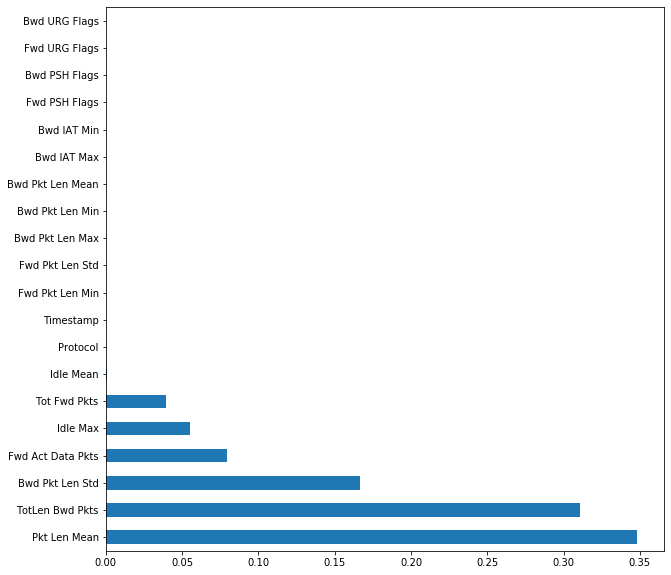

In [6]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Protocol            0.0
Timestamp           0.0
Fwd Pkt Len Min     0.0
Fwd Pkt Len Std     0.0
Bwd Pkt Len Max     0.0
Bwd Pkt Len Min     0.0
Bwd Pkt Len Mean    0.0
Bwd IAT Max         0.0
Bwd IAT Min         0.0
Fwd PSH Flags       0.0
Bwd PSH Flags       0.0
Fwd URG Flags       0.0
Bwd URG Flags       0.0
Pkt Len Min         0.0
FIN Flag Cnt        0.0
SYN Flag Cnt        0.0
URG Flag Cnt        0.0
CWE Flag Count      0.0
ECE Flag Cnt        0.0
Bwd Seg Size Avg    0.0
dtype: float64


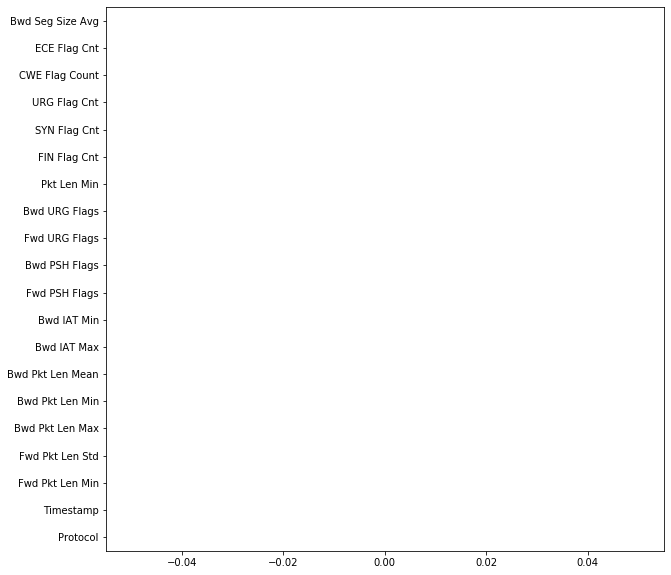

In [7]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))